In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
Added new cell only for myrmote

In [ ]:
Added one more

In [28]:
#Variables
path = "../HUPA-UC Diabetes Dataset/"
demographic_path = path + "T1DM_patient_sleep_demographics_with_race.csv"
all_patients_path = path + "ALL_PATIENTS.csv"
modified_demographic_path = path+"DEMOGRAPHIC.csv"
patients_demographic_path = path +"PATIENTS_WITH_DEMOGRAPHIC.csv"

In [29]:
demographic_df = pd.read_csv(modified_demographic_path)
demographic_df.columns

Index(['patient_id', 'age', 'gender', 'race', 'avg_sleep_duration_hrs',
       'sleep_quality_score', 'sleep_disturbances_percentage'],
      dtype='object')

In [37]:
demographic_df.sort_values('age')
#demographic_df['age']
#Categorize AGE
def age_category(patient_age):
    if 18 <= patient_age < 40:
        return 'Young Adults[18-40]'
    elif 40 <= patient_age < 60:
        return 'Middle Age [41-60]'
    elif patient_age > 60:
        return 'Older Adults[>60]'
demographic_df['age_group'] = demographic_df['age'].apply(age_category)

# demographic_df.columns
# demographic_df['age_group']
# demographic_df[['age','age_group']]

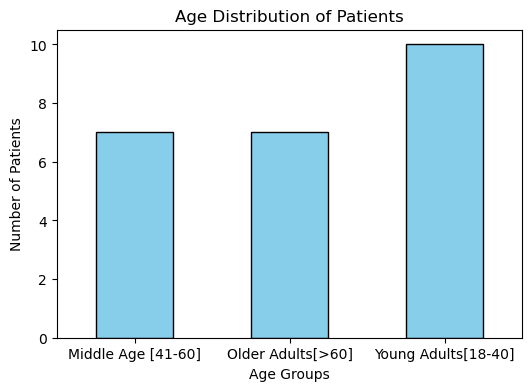

In [38]:
# Count per group
age_counts = demographic_df['age_group'].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(6,4))
age_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Age Distribution of Patients")
plt.xlabel("Age Groups")
plt.ylabel("Number of Patients")
plt.xticks(rotation=0)
plt.show()

In [67]:
age_counts.describe()

count     3.000000
mean      8.000000
std       1.732051
min       7.000000
25%       7.000000
50%       7.000000
75%       8.500000
max      10.000000
Name: count, dtype: float64

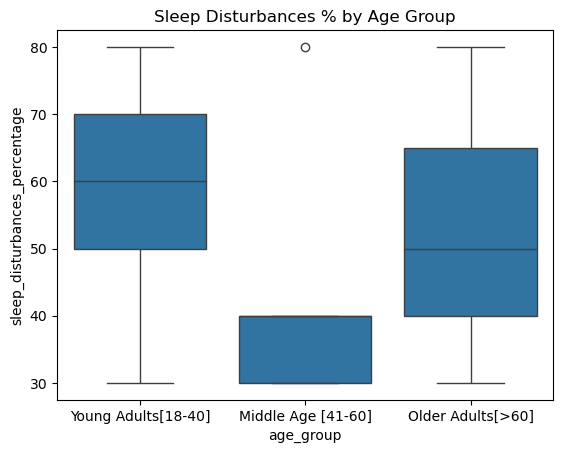

In [39]:
sns.boxplot(x="age_group", y="sleep_disturbances_percentage", data=demographic_df)
plt.title("Sleep Disturbances % by Age Group")
plt.show()

In [57]:
print(demographic_df.loc[(demographic_df['age']<40), 'sleep_disturbances_percentage'].describe())
print(demographic_df.loc[(demographic_df['age']>40) & (demographic_df['age']<60), 'sleep_disturbances_percentage'].describe())
print(demographic_df.loc[(demographic_df['age']>60), 'sleep_disturbances_percentage'].describe())


count    10.000000
mean     60.000000
std      15.634719
min      30.000000
25%      50.000000
50%      60.000000
75%      70.000000
max      80.000000
Name: sleep_disturbances_percentage, dtype: float64
count     7.000000
mean     41.428571
std      17.728105
min      30.000000
25%      30.000000
50%      40.000000
75%      40.000000
max      80.000000
Name: sleep_disturbances_percentage, dtype: float64
count     7.000000
mean     52.857143
std      17.994708
min      30.000000
25%      40.000000
50%      50.000000
75%      65.000000
max      80.000000
Name: sleep_disturbances_percentage, dtype: float64


In [65]:
#demographic_df
print(demographic_df.loc[(demographic_df['age']<=40), 'sleep_disturbances_percentage'])
print(demographic_df.loc[(demographic_df['age']>40) & (demographic_df['age']<=60), 'sleep_disturbances_percentage'])
print(demographic_df.loc[(demographic_df['age']>60), 'sleep_disturbances_percentage'])


0     80
3     60
5     60
8     50
11    50
14    80
16    70
17    70
18    30
22    50
Name: sleep_disturbances_percentage, dtype: int64
1     40
4     30
10    30
12    40
15    30
20    80
21    40
23    60
Name: sleep_disturbances_percentage, dtype: int64
2     70
6     80
7     40
9     60
13    50
19    40
24    30
Name: sleep_disturbances_percentage, dtype: int64


In [66]:
print(demographic_df.loc[(demographic_df['age']<=40), 'sleep_disturbances_percentage'].describe())
print(demographic_df.loc[(demographic_df['age']>40) & (demographic_df['age']<=60), 'sleep_disturbances_percentage'].describe())
print(demographic_df.loc[(demographic_df['age']>60), 'sleep_disturbances_percentage'].describe())


count    10.000000
mean     60.000000
std      15.634719
min      30.000000
25%      50.000000
50%      60.000000
75%      70.000000
max      80.000000
Name: sleep_disturbances_percentage, dtype: float64
count     8.00000
mean     43.75000
std      17.67767
min      30.00000
25%      30.00000
50%      40.00000
75%      45.00000
max      80.00000
Name: sleep_disturbances_percentage, dtype: float64
count     7.000000
mean     52.857143
std      17.994708
min      30.000000
25%      40.000000
50%      50.000000
75%      65.000000
max      80.000000
Name: sleep_disturbances_percentage, dtype: float64


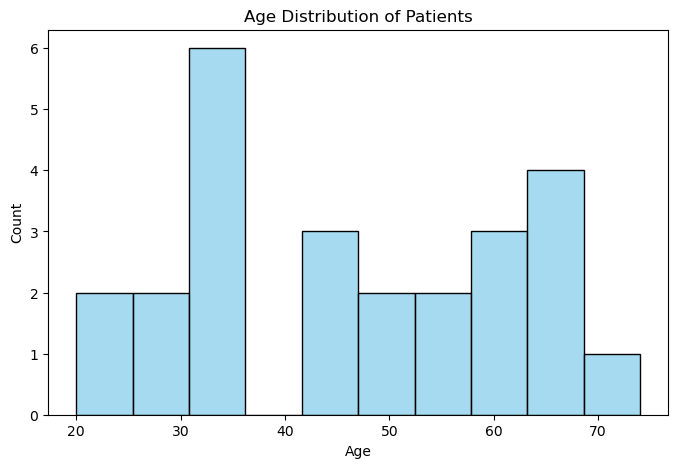

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(data=demographic_df, x="age", bins=10, kde=False, color="skyblue", edgecolor="black")

plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [68]:
import statsmodels.api as sm

X = demographic_df['avg_sleep_duration_hrs']
y = demographic_df['sleep_disturbances_percentage']
X = sm.add_constant(X)  # add intercept
model = sm.OLS(y, X).fit()
print(model.summary())

                                  OLS Regression Results                                 
Dep. Variable:     sleep_disturbances_percentage   R-squared:                       0.000
Model:                                       OLS   Adj. R-squared:                 -0.043
Method:                            Least Squares   F-statistic:                 4.553e-07
Date:                           Mon, 25 Aug 2025   Prob (F-statistic):              0.999
Time:                                   20:27:04   Log-Likelihood:                -106.78
No. Observations:                             25   AIC:                             217.6
Df Residuals:                                 23   BIC:                             220.0
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------

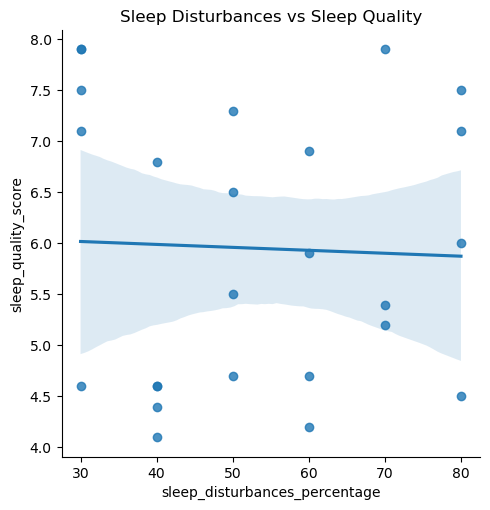

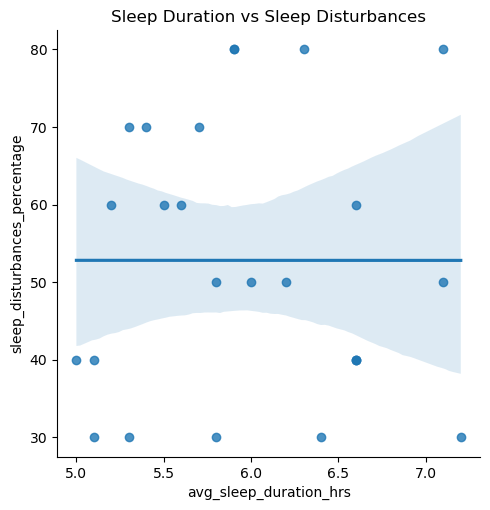

In [69]:
# Sleep disturbances vs. sleep quality
sns.lmplot(x='sleep_disturbances_percentage', y='sleep_quality_score', data=demographic_df)
plt.title("Sleep Disturbances vs Sleep Quality")
plt.show()

# Sleep disturbances vs. sleep duration
sns.lmplot(x='avg_sleep_duration_hrs', y='sleep_disturbances_percentage', data=demographic_df)
plt.title("Sleep Duration vs Sleep Disturbances")
plt.show()

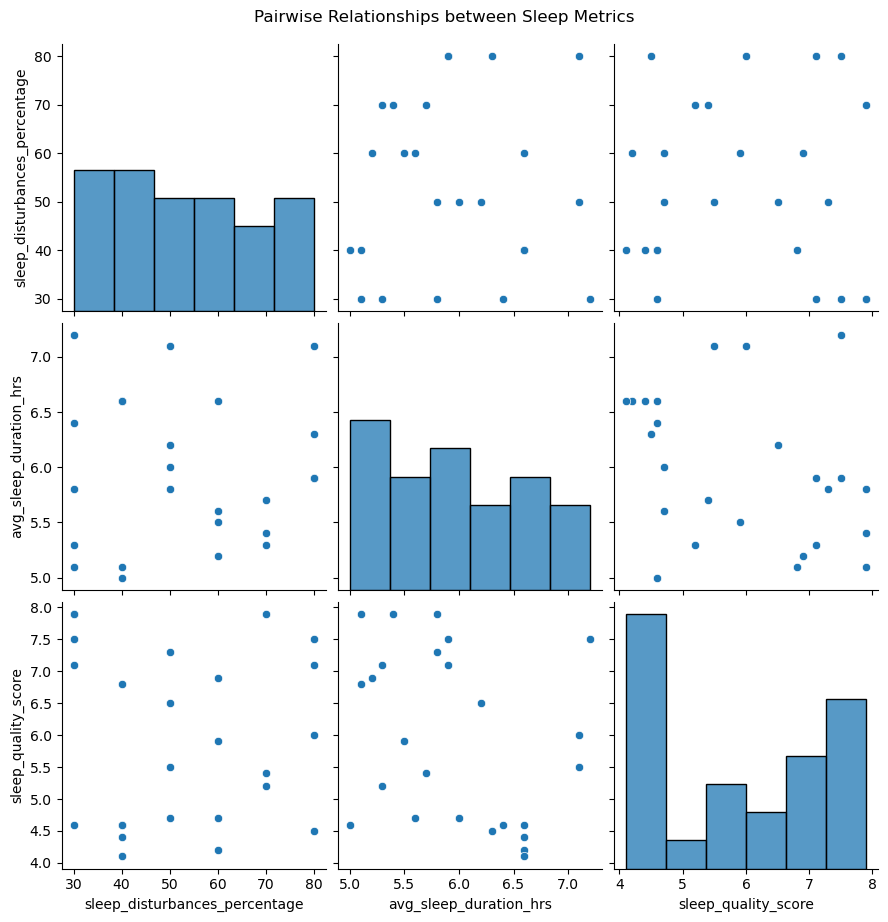

In [70]:
#Pairplot (all-in-one scatter + histogram)
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['sleep_disturbances_percentage', 'avg_sleep_duration_hrs', 'sleep_quality_score']

sns.pairplot(demographic_df[cols], kind='scatter', diag_kind='hist', height=3)
plt.suptitle("Pairwise Relationships between Sleep Metrics", y=1.02)
plt.show()

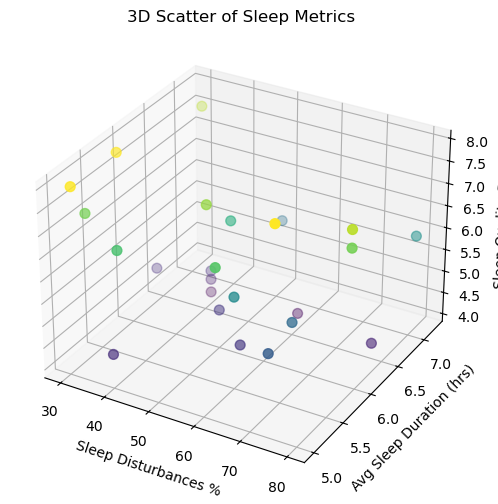

In [72]:
#3D scatter plot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    demographic_df['sleep_disturbances_percentage'],
    demographic_df['avg_sleep_duration_hrs'],
    demographic_df['sleep_quality_score'],
    c=demographic_df['sleep_quality_score'], cmap='viridis', s=50
)

ax.set_xlabel('Sleep Disturbances %')
ax.set_ylabel('Avg Sleep Duration (hrs)')
ax.set_zlabel('Sleep Quality Score')
plt.title("3D Scatter of Sleep Metrics")
plt.show()

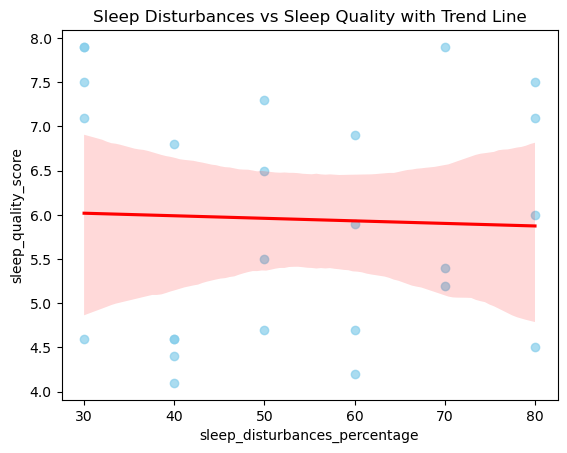

In [73]:
#Seaborn regression chart
sns.regplot(
    x='sleep_disturbances_percentage',
    y='sleep_quality_score',
    data=demographic_df,
    scatter_kws={'color':'skyblue', 'alpha':0.7},
    line_kws={'color':'red'}
)
plt.title("Sleep Disturbances vs Sleep Quality with Trend Line")
plt.show()

In [75]:
#Statistic model how sleep_disturbances_percenatage affect sleep_quality
import statsmodels.api as sm

X = demographic_df['sleep_disturbances_percentage']
y = demographic_df['sleep_quality_score']
X = sm.add_constant(X)  # add intercept
model = sm.OLS(y, X).fit()
print(model.summary())
print('Data is not cleared so added age column')

                             OLS Regression Results                            
Dep. Variable:     sleep_quality_score   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                 -0.042
Method:                  Least Squares   F-statistic:                   0.03323
Date:                 Mon, 25 Aug 2025   Prob (F-statistic):              0.857
Time:                         20:37:28   Log-Likelihood:                -42.311
No. Observations:                   25   AIC:                             88.62
Df Residuals:                       23   BIC:                             91.06
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
cons

In [77]:
import statsmodels.api as sm

# Predictor variables
X = demographic_df[['sleep_disturbances_percentage', 'avg_sleep_duration_hrs', 'age']]

# Response variable
y = demographic_df['sleep_quality_score']

# Add constant term for intercept
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     sleep_quality_score   R-squared:                       0.115
Model:                             OLS   Adj. R-squared:                 -0.012
Method:                  Least Squares   F-statistic:                    0.9057
Date:                 Mon, 25 Aug 2025   Prob (F-statistic):              0.455
Time:                         20:42:23   Log-Likelihood:                -40.808
No. Observations:                   25   AIC:                             89.62
Df Residuals:                       21   BIC:                             94.49
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
cons

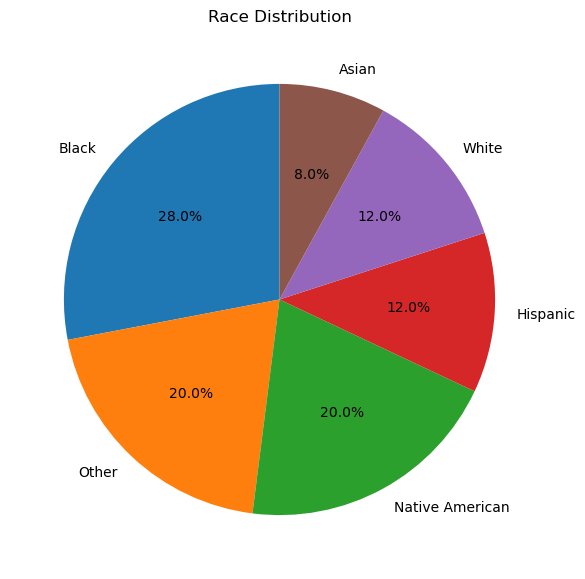

In [78]:
#Pie chart for race distribution
race_counts = demographic_df['race'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Race Distribution")
plt.show()

In [81]:
race_p= demographic_df['race'].value_counts(normalize=True) * 100
print(race_p)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
24   NaN
Name: race_counts, dtype: float64